In [1]:
# This notebook is the trial with CUAD dataset

# Sentence Segmentation

# The first step in building a knowledge graph is to split the text document or article into sentences.

In [2]:
# import stanza
# stanza.download('en') # download the model first


# nlp_stanza = stanza.Pipeline(lang='en', processors='tokenize')
# # doc = nlp('This is a test sentence for stanza. This is another sentence.')

In [3]:
import sys
import json
import os
import pandas as pd
import re
import numpy as np


## import the library spaCy

import bs4
import requests
import spacy
from spacy import displacy
nlp_spacy = spacy.load('en_core_web_md')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
# function to read the json data
def get_data(path): 
    data=[]
    with open(path, 'r') as f: # read version. if the datasize is too larger, read(size) is recommended
        for jsonObj in f: # each {} is a json object
            obj = json.loads(jsonObj)
            data.append(obj)
    return data

In [5]:
# function to read the json data
def get_CUAD_data(path): 
    with open(path,) as f: # read version. if the datasize is too larger, read(size) is recommended
        data = json.load(f)
    return data

In [6]:
# function to read the csv file
def get_csv_data(path): 
    with open(path,) as f: # read version. if the datasize is too larger, read(size) is recommended
        data = pd.read_csv(f)
    return data

In [7]:
# function to read xlsx file
def get_excel_data(path,sheet_name):
    data = pd.read_excel(io=path,sheet_name = sheet_name)
    return data
# file_name =  # path to file + file name
# sheet =  # sheet name or sheet number or list of sheet numbers and names

# df = pd.read_excel(io=file_name, sheet_name=sheet)
# print(df.head(5))  # print first 5 rows of the dataframe

In [8]:
CUAD_data = get_CUAD_data('/Users/cinder/Desktop/FYP/cuad-main/data/CUADv1.json')
#CUAD data is stores as a whole json object  

In [9]:
CORD_NER_data = get_data('/Users/cinder/Desktop/FYP/FYP-master/Pipeline/data/CORD_NER_full.json')

In [10]:
Anti_assignment_Change_of_control = get_excel_data('/Users/cinder/Desktop/FYP/CUAD_v1/label_group_xlsx/Anti_assignment_CIC_Group3.xlsx','Anti_assignment')

In [11]:
Anti_assignment_Change_of_control

,Filename,Change of Control,Anti-assignment
0,CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605784_EX-10.27_Affiliate Agreement.pdf,NaN,"MA may not assign, sell, lease or otherwise transfer in whole or in party any of the rights granted pursuant to this Agreement without prior written approval of Company. (Page 12)"
1,EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B(01)_525118_EX-10.B(01)_Content License Agreement.pdf,NaN,"This Agreement may not be assigned, sold or transferred without the prior written consent of the other party. (Page 9)\n\nNotwithstanding the foregoing, Rogers may, without consent, assign its rig..."
2,GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10.1_Content License Agreement.pdf,"For purposes of the preceding sentence, and without limiting its generality, any merger, consolidation or reorganization involving Licensee (regardless of whether Licensee is a surviving or disapp...","Licensee shall not assign or otherwise transfer any of its rights, or delegate or otherwise transfer any of its obligations or performance, under this Agreement, in each case whether voluntarily, ..."
3,IdeanomicsInc_20160330_10-K_EX-10.26_9512211_EX-10.26_Content License Agreement.pdf,NaN,"Licensee shall have the right to assign or sublicense any or all of its rights granted under this Agreement, in whole or in part, to third parties exhibiting the Titles in the ordinary course of L..."
4,DeltathreeInc_19991102_S-1A_EX-10.19_6227850_EX-10.19_Co-Branding Agreement_ Service Agreement.pdf,"The term of this Agreement shall be effective as of the date first stated above and shall continue for a term of three (3) years, unless terminated earlier in accordance with the provisions of thi...","This Agreement may not be assigned by DeltaThree without the prior written consent of PrimeCall. (Page 5)\n\nExcept as provided in the preceding sentence, this Agreement may not be assigned by Pri..."
...,...,...,...
371,"NETGEAR,INC_04_21_2003-EX-10.16-DISTRIBUTOR AGREEMENT.pdf",NaN,"This Agreement may not be assigned by either party without prior written permission from the other party, which permission shall not be unreasonably withheld or delayed. Any attempt by either part..."
372,NEONSYSTEMSINC_03_01_1999-EX-10.5-DISTRIBUTOR AGREEMENT_Amendment.pdf,"So long as the Option shall be in existence (whether or not exercisable), Skunkware and Licensor agree that Licensor will conduct its business in the ordinary course and will ...","Any sale, transfer or other conveyance of all or any part of the stock in, or assets of, Licensor in violation of this Section shall be null and void. (Page 3)"
373,NEONSYSTEMSINC_03_01_1999-EX-10.5-DISTRIBUTOR AGREEMENT_New.pdf,Licensor may terminate this Agreement:\n<omitted>\n(2) Upon thirty (30) days prior written notice if Licensee enters into an agreement or other arrangement relating to the merger of Li...,"Neither this Agreement nor any of the rights, interests or obligations hereunder shall be assigned by any of the parties hereto without the prior written consent of the other party to this Agreeme..."
374,WOMENSGOLFUNLIMITEDINC_03_29_2000-EX-10.13-ENDORSEMENT AGREEMENT.PDF,NaN,"The sum of the Quarterly Grant Numbers in each calendar year of the Term shall not exceed fifteen thousand (15,000). The options will expire five (5) years after each grant date. (Page 3)\n\nThe O..."


In [12]:
Governing_Law = get_excel_data('/Users/cinder/Desktop/FYP/CUAD_v1/label_group_xlsx/Governing_Law.xlsx','Governing_Law')

In [13]:
Governing_Law['Governing Law'][0]

'This Agreement is accepted by Company in the State of Nevada and shall be governed by and construed in accordance with the laws thereof, which laws shall prevail in the event of any conflict. (Page 13)'

In [14]:
CUAD_data['data'][0]

{'title': 'LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGREEMENT',
 'paragraphs': [{'qas': [{'answers': [{'text': 'DISTRIBUTOR AGREEMENT',
       'answer_start': 44}],
     'id': 'LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGREEMENT__Document Name',
     'question': 'Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract',
     'is_impossible': False},
    {'answers': [{'text': 'Distributor', 'answer_start': 244},
      {'text': 'Electric City Corp.', 'answer_start': 148},
      {'text': 'Electric City of Illinois L.L.C.', 'answer_start': 49574},
      {'text': 'Company', 'answer_start': 197},
      {'text': 'Electric City of Illinois LLC', 'answer_start': 212}],
     'id': 'LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGREEMENT__Parties',
     'question': 'Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed t

In [15]:
CSV_data = get_csv_data('/Users/cinder/Desktop/FYP/CUAD_v1/master_clauses.csv')

In [16]:
CSV_data['Parties'][0]

"['BIRCH FIRST GLOBAL INVESTMENTS INC.', 'MA', 'Marketing Affiliate', 'MOUNT KNOWLEDGE HOLDINGS INC.', 'Company']"

In [17]:
### below is the use of spaCy

In [18]:
# doc_01 = nlp_spacy(Governing_Law['Governing Law'][0])

In [19]:
# for tok in doc_01:
#   print(tok.text, "...", tok.dep_)

NameError: name 'doc_01' is not defined

In [20]:
candidate_sentences =[]

pattern_1 = re.compile("\(Page [0-9]*\)") # regular expression to handle the page note in the data
pattern_2 = re.compile("\. ") # handle the blank behind .
pattern_3 = re.compile("\s\s\s*") # handle the multiple blanks
for i in range(len(Governing_Law['Governing Law'])):
    temp = str(Governing_Law['Governing Law'][i])
    temp = temp.replace('\n', '')
    temp = temp.replace('\n\n', '')# handle the '\n' in sentences
    temp = pattern_1.sub("",temp)
    temp = pattern_2.sub(".",temp)
    temp = pattern_3.sub("",temp)
    sentences = [j for j in nlp_spacy(temp).sents]
    for k in range(len(sentences)):
        if str(sentences[k]) != ' ':
            if str(sentences[k]) != 'nan':
                candidate_sentences.append(str(sentences[k]))

In [21]:
# pattern = re.compile("\(Page [0-9]*\)")

In [22]:
# temp = pattern.sub("","Canada applicable therein. (Page 11)")

In [23]:
# Governing_Law['Governing Law'][0]

In [24]:
# test = Governing_Law['Governing Law'][1]

In [25]:
# test.replace('\n\n', '')

In [26]:
candidate_sentences[0] 

'This Agreement is accepted by Company in the State of Nevada and shall be governed by and construed in accordance with the laws thereof, which laws shall prevail in the event of any conflict.'

In [27]:
# pattern_3 = re.compile("\s\s\s*") 

In [28]:
# test = pattern_3.sub("",test)
# test

In [29]:
# test = str(candidate_sentences[0])

In [30]:
# Entity Pairs Extraction
# The main idea is to go through a sentence and extract the subject and the object as and when they are encountered.

In [31]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp_spacy(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [32]:
entity_pairs = []

for i in tqdm(candidate_sentences):
  entity_pairs.append(get_entities(i))

100%|██████████| 471/471 [00:03<00:00, 148.10it/s]


In [33]:
entity_pairs

[['thereof  laws', 'conflict'],
 ['Agreement', 'federal  Canada'],
 ['which', 'now  force'],
 ['questions', 'Florida'],
 ['Agreement', 'internal law provision'],
 ['Agreement', 'laws principles'],
 ['Agreement', 'laws principles'],
 ['actual California that', 'other  California'],
 ['legal  Agreement', 'performedentirely State Tennessee'],
 ['Los Angeles interpretation', 'California'],
 ['Agreement', 'laws principles'],
 ['Agreement', 'laws provisions'],
 ['Agreement', 'substantive laws principles'],
 ['validity', 'legal law rules'],
 ['dispute', 'arising laws construction'],
 ['agreement', 'contractual Ohio law'],
 ['purposes', 'substantive laws provisions'],
 ['Agreement', 'laws'],
 ['Agreement', 'laws provisions'],
 ['RIGHTS', 'SUBSTANTIVE  TEXAS'],
 ['U.S.A.WITHOUT', 'LAWS'],
 ['any', 'exclusively  Michigan'],
 ['any', 'exclusively New York'],
 ['expressly  Agreement', 'applicable New law'],
 ['Agreement', 'exclusively  Netherlands'],
 ['Agreement', 'law principles'],
 ['Agreement'

In [34]:
# Relation / Predicate Extraction

# Our hypothesis is that the predicate is actually the main verb in a sentence.

In [35]:
def get_relation(sent):

  doc = nlp_spacy(sent)

  # Matcher class object 
  matcher = Matcher(nlp_spacy.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [36]:
relations = [get_relation(i) for i in tqdm(candidate_sentences)]

100%|██████████| 471/471 [00:03<00:00, 142.67it/s]


In [37]:
pd.Series(relations).value_counts()[:50]

governed by            254
governed                29
construed               22
construed in            15
governed in             12
interpreted             10
GOVERNED                 9
deemed                   8
govern                   7
agree                    7
is                       7
hereto                   5
entered into             5
be subject               4
apply to                 3
is subject               3
GOVERNED IN              3
WITHOUT                  2
controlled by            2
resolved by              2
GOVERNED BY              2
Agreement                2
arise out                2
enter into               2
construed under          1
be construedin           1
declare                  1
requires                 1
4.8                      1
control                  1
BE IN                    1
settled under            1
accepted by              1
accordance with          1
made in                  1
contemplated             1
BE                       1
i

In [38]:
# Build a Knowledge Graph
''' We will finally create a knowledge graph from the extracted entities (subject-object pairs)
    and the predicates (relation between entities).'''

' We will finally create a knowledge graph from the extracted entities (subject-object pairs)\n    and the predicates (relation between entities).'

In [39]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [40]:
kg_df

,source,target,edge
0,thereof laws,conflict,accepted by
1,Agreement,federal Canada,governed by
2,which,now force,is subject
3,questions,Florida,governed by
4,Agreement,internal law provision,governed by
...,...,...,...
466,Agreement,entire law,constitutes
467,Amendment,Distributor Agreement,governed by
468,AGREEMENT,BY TEXAS,GOVERNED
469,validity,such New state,governed


In [41]:
# pre-process the kg_df, drop the empty list
empty_list=[]
for i in range(len(kg_df["source"])):
    if kg_df["source"][i] == "":
        if i not in empty_list:
            empty_list.append(i)
    if kg_df["target"][i] == "":
        if i not in empty_list:
            empty_list.append(i)
    if kg_df["edge"][i] == "":
        if i not in empty_list:
            empty_list.append(i)

In [42]:
empty_list

[44, 52, 63, 94, 102, 135, 172, 185, 285, 302, 314, 315, 341, 362, 375]

In [43]:
cleankg = kg_df.drop(empty_list)
cleankg.reset_index(drop=True, inplace=True)

In [44]:
cleankg.to_csv('/Users/cinder/Desktop/FYP/Feb/aggrement_kg_df.csv')

In [45]:
# create a directed-graph from a dataframe
# we will use the networkx library to create a network from this dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

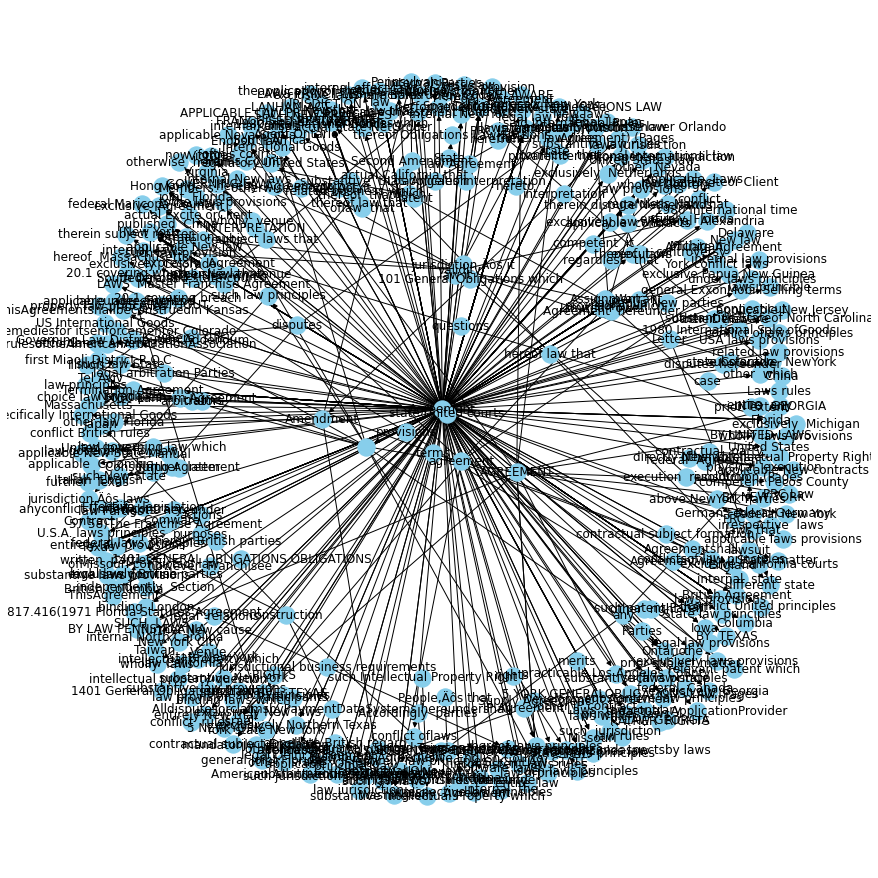

In [46]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

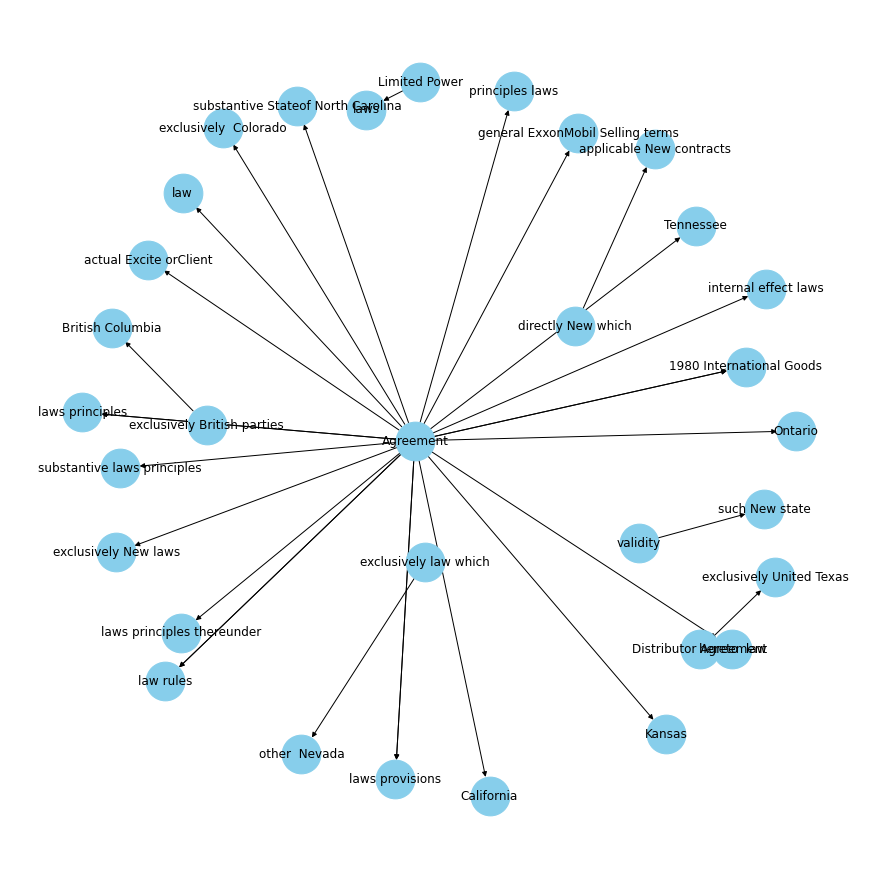

In [47]:

'''it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. 
    Let’s start with the relation “governed” '''

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="governed"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

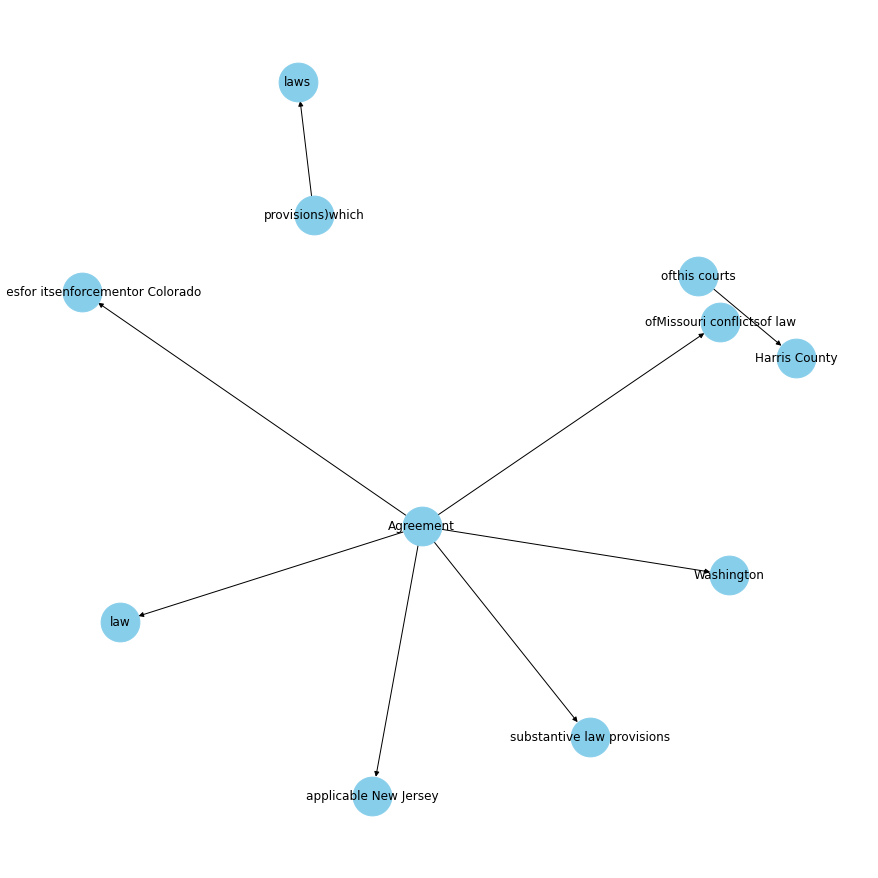

In [48]:

'''it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. 
    Let’s start with the relation “interpreted” '''

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="deemed"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [49]:
# construed